In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")


In [216]:
data=pd.read_csv("titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


In [218]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [219]:
data=data.drop("Cabin",axis=1)

In [220]:
data["Age"]=data["Age"].fillna(data["Age"].median())
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [221]:
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

In [222]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [223]:
temp=data["Survived"].value_counts()
temp

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

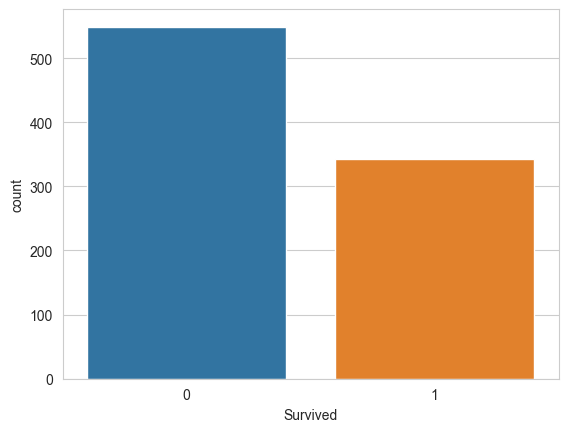

In [224]:
sns.countplot(data=data,x="Survived")

In [225]:
data.groupby(["Sex","Survived"]).agg({"Survived":"count"})

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [226]:
data["Survived"].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

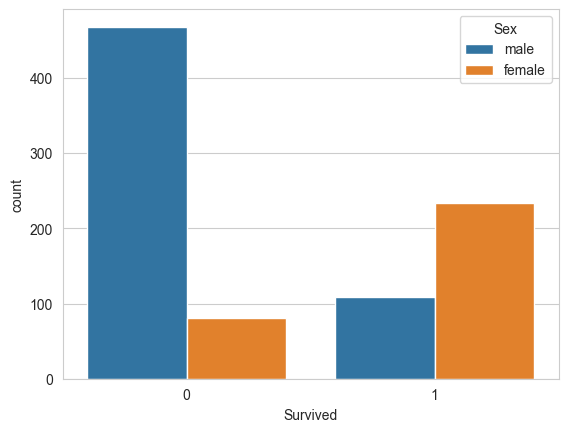

In [227]:
sns.countplot(data=data,x="Survived",hue="Sex")

In [228]:
temp=data.groupby("Sex",as_index=False).agg({"Survived":"mean"})
temp

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

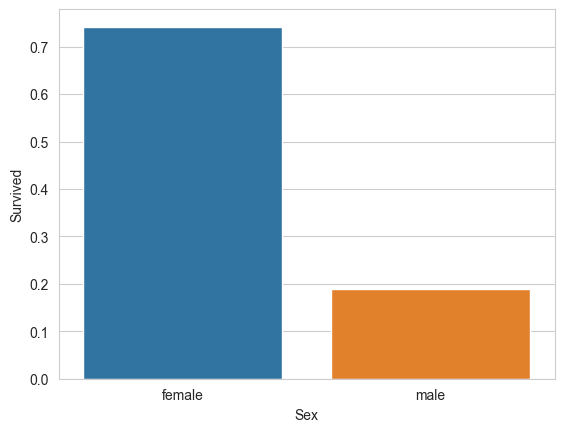

In [229]:
sns.barplot(data=temp,x="Sex",y="Survived")

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [264]:
condition=[data["Age"] <= 1, (data["Age"]>1) & (data["Age"]<=12), data["Age"] >= 12]
choices=["Infant","Children","Adult"]
data["Age_band"]=np.select(condition,choices)

In [265]:
data["Age_band"].value_counts()

Adult       822
Children     55
Infant       14
Name: Age_band, dtype: int64

In [266]:
data.groupby(["Survived","Age_band"]).agg({"Survived":"count"})

Survived
Survived Age_band          
0        Adult          520
         Children        27
         Infant           2
1        Adult          302
         Children        28
         Infant          12

<AxesSubplot:xlabel='Survived', ylabel='count'>

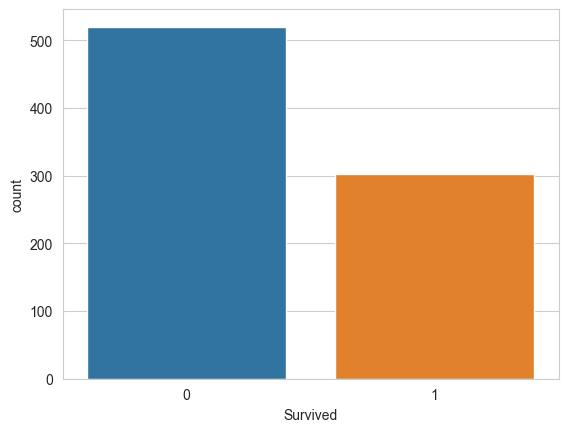

In [267]:
sns.countplot(data=data[data["Age_band"]=="Adult"],x="Survived")

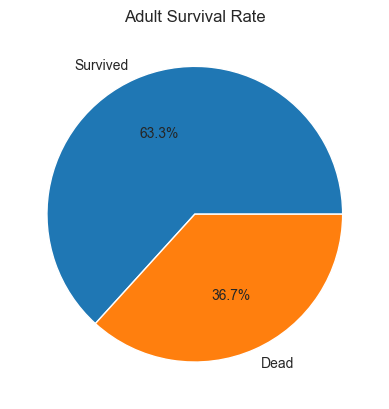

In [281]:
plt.pie(data[data["Age_band"]=="Adult"].loc[:,"Survived"].value_counts(), labels = ["Survived","Dead"], autopct='%.1f%%')
plt.title("Adult Survival Rate")
plt.show()

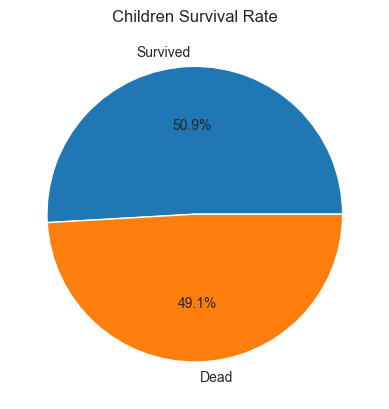

In [282]:
plt.pie(data[data["Age_band"]=="Children"].loc[:,"Survived"].value_counts(), labels = ["Survived","Dead"], autopct='%.1f%%')
plt.title("Children Survival Rate")
plt.show()

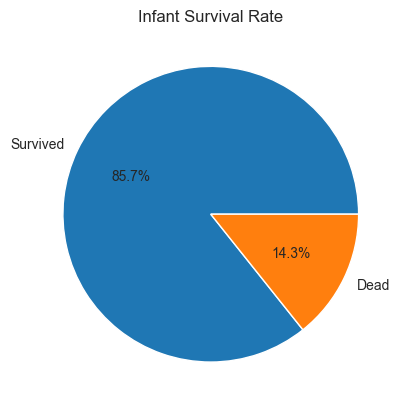

In [283]:
plt.pie(data[data["Age_band"]=="Infant"].loc[:,"Survived"].value_counts(), labels = ["Survived","Dead"], autopct='%.1f%%')
plt.title("Infant Survival Rate")
plt.show()

In [284]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [290]:
data.groupby(["Survived","Pclass"]).agg({"Survived":"count"})

Survived
Survived Pclass          
0        1             80
         2             97
         3            372
1        1            136
         2             87
         3            119

[[Text(0, 0, '1st Class'),
  Text(1, 0, 'Passenger Class'),
  Text(2, 0, 'Workers Class')]]

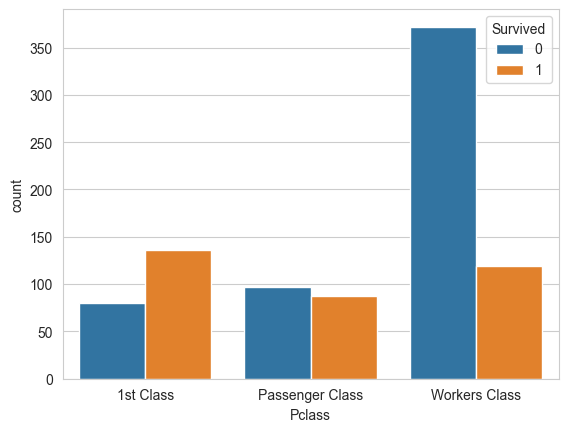

In [305]:
ax=sns.countplot(data,x="Pclass",hue="Survived")
ax.set(xticklabels=["1st Class","Passenger Class","Workers Class"])

[[Text(0, 0, '1st Class'),
  Text(1, 0, 'Passenger Class'),
  Text(2, 0, 'Workers Class')]]

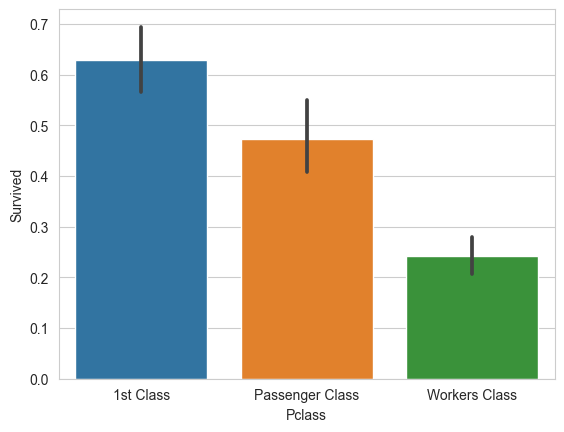

In [307]:
ax=sns.barplot(data,x="Pclass",y="Survived")
ax.set(xticklabels=["1st Class","Passenger Class","Workers Class"])


In [309]:
data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [315]:
temp=data.groupby(["Embarked"],as_index=False).agg({"Survived":"mean"})
temp

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

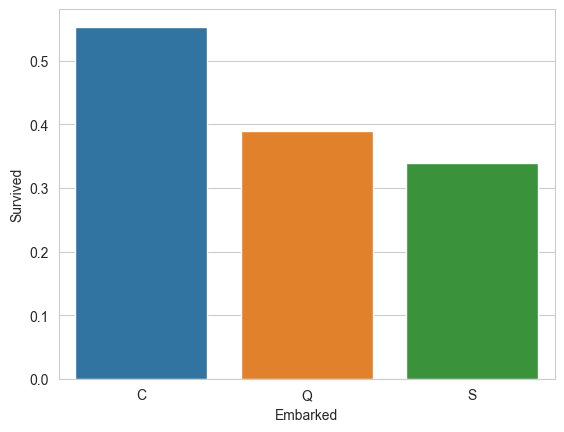

In [317]:
sns.barplot(data=temp,x="Embarked",y="Survived")

In [318]:
data["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

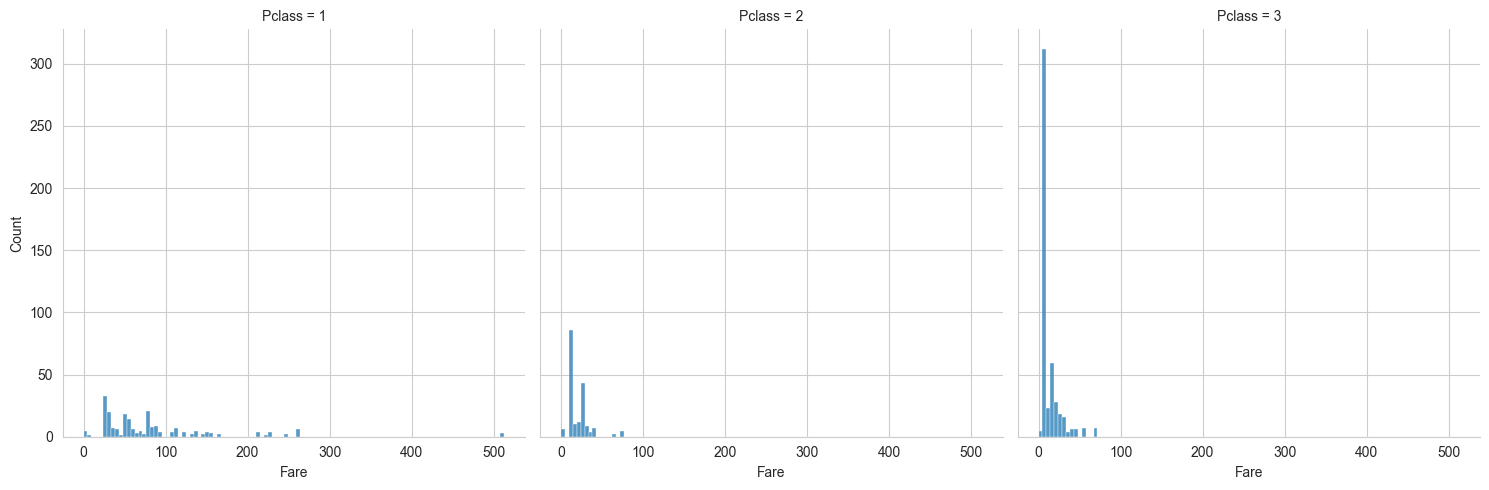

In [341]:
sns.displot(data=data,x="Fare",col="Pclass",col_wrap=3)

In [345]:
temp=data.groupby(["Pclass"],as_index=False).agg({"Fare":"mean"})
temp

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

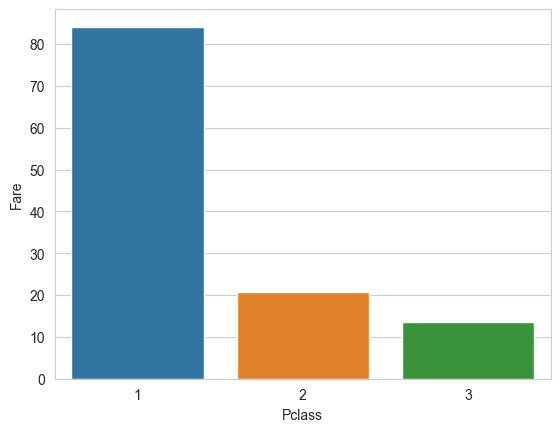

In [346]:
sns.barplot(data=temp,x="Pclass",y="Fare")

In [347]:
temp=data.groupby(["Embarked"],as_index=False).agg({"Fare":"mean"})
temp

,Embarked,Fare
0,C,59.954144
1,Q,13.276030
2,S,27.243651


<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

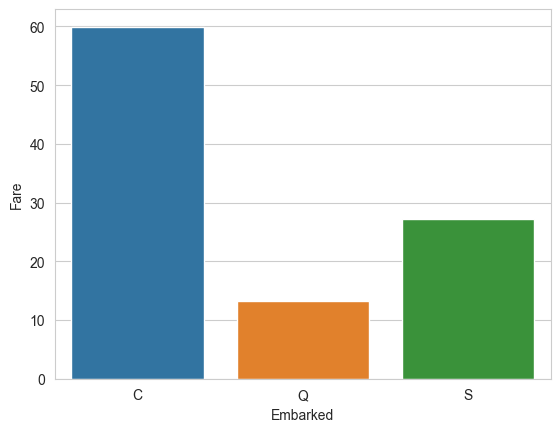

In [348]:
sns.barplot(data=temp,x="Embarked",y="Fare")

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

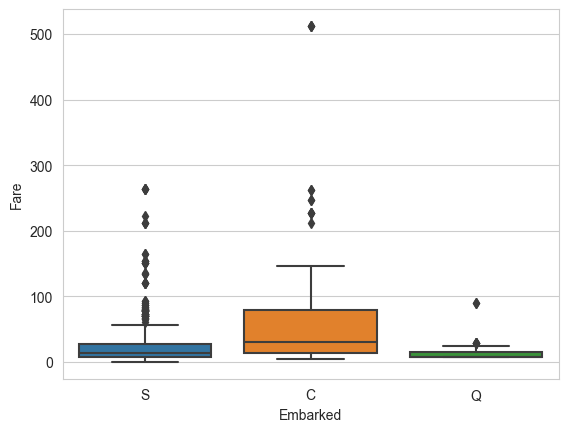

In [351]:
sns.boxplot(data=data,x="Embarked",y="Fare")

<AxesSubplot:xlabel='Age', ylabel='Count'>

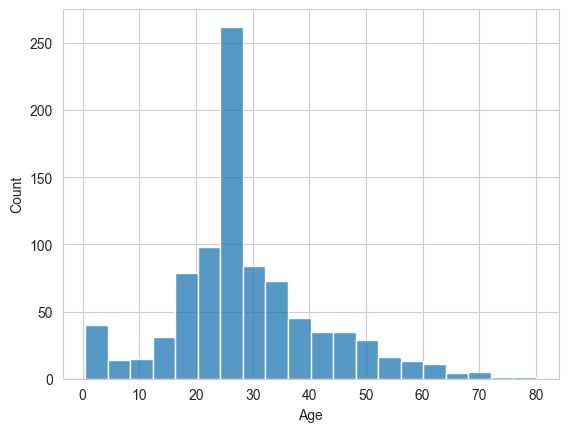

In [356]:
sns.histplot(data=data,x="Age",bins=20)

In [358]:
temp=data.loc[:,["Age","Survived"]]
temp

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,28.0,0
889,26.0,1


<AxesSubplot:>

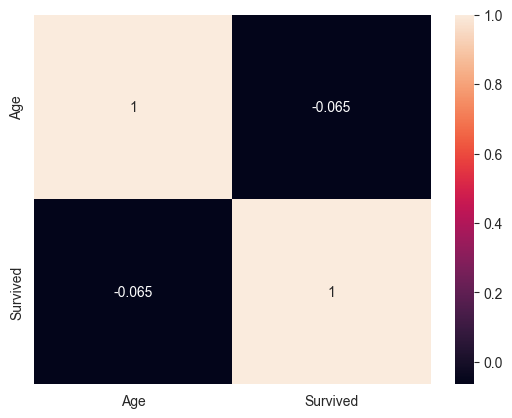

In [361]:
sns.heatmap(temp.corr(),annot=True)


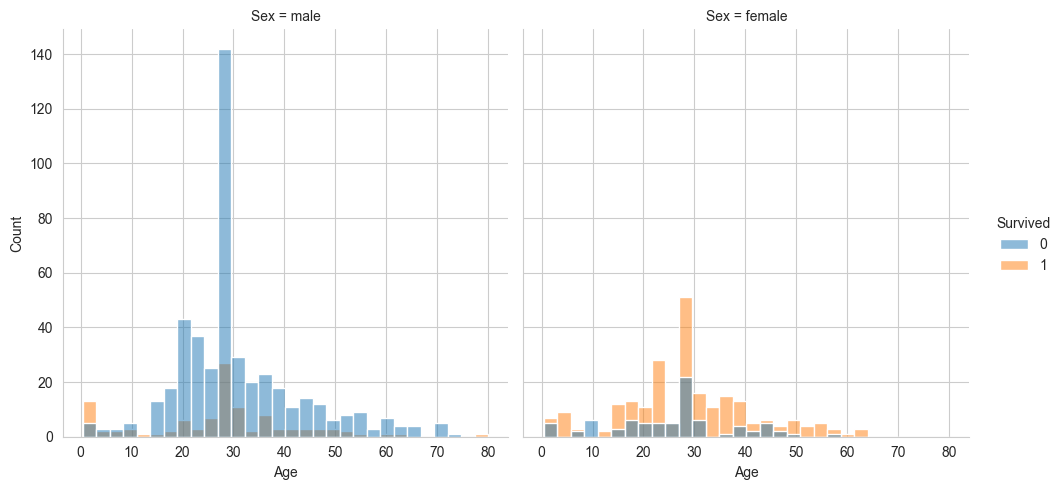

In [371]:
sns.displot(data=data,x="Age",hue="Survived",kind="hist",col="Sex")

In [382]:
data["solo"]=data["solo"].apply(lambda x:0 if x==0 else 1)

In [383]:
data["solo"].value_counts()

0    537
1    354
Name: solo, dtype: int64

[Text(0, 0, 'Solo'), Text(1, 0, 'Family')]

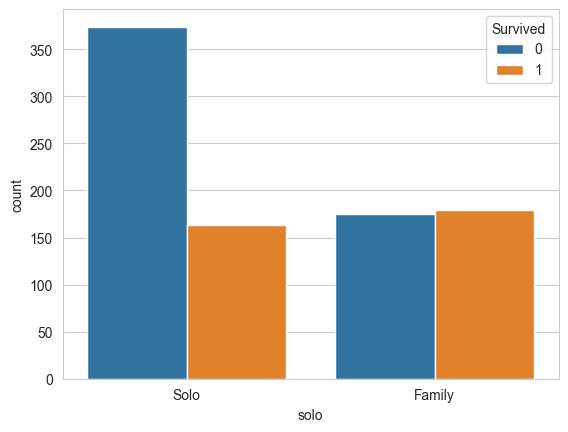

In [387]:
ax=sns.countplot(data=data,x="solo",hue="Survived")
ax.set_xticklabels(["Solo","Family"])

[Text(0, 0, 'Solo'), Text(1, 0, 'Family')]

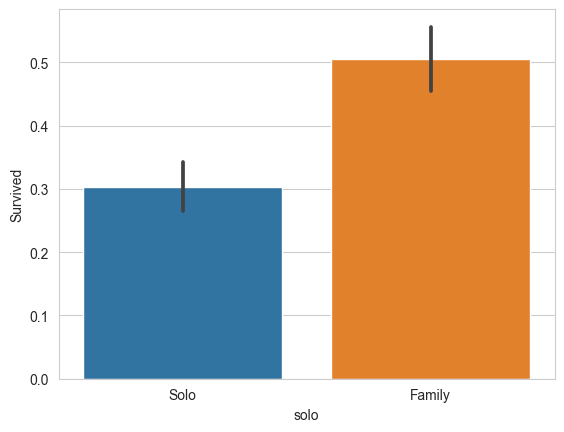

In [386]:
ax=sns.barplot(data=data,x="solo",y="Survived")
ax.set_xticklabels(["Solo","Family"])

In [393]:
data["family_size"]=data["Parch"]+data["SibSp"]+1
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_band,solo,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Adult,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Adult,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Adult,1,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Adult,0,1


In [394]:
data["family_size"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

In [395]:
data.groupby(["family_size"]).agg({"Survived":"mean"})

,Survived
family_size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


<AxesSubplot:xlabel='family_size', ylabel='Survived'>

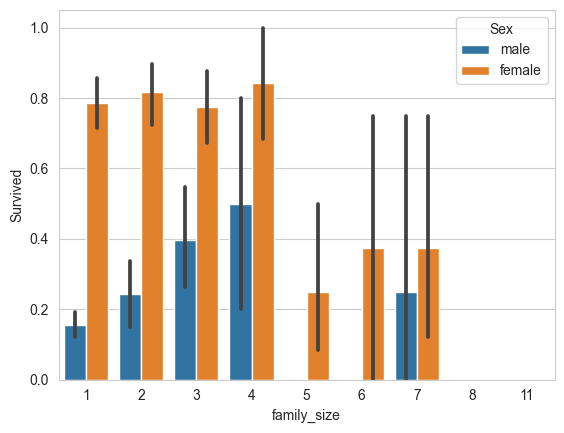

In [396]:
sns.barplot(data=data,x="family_size",y="Survived",hue="Sex")

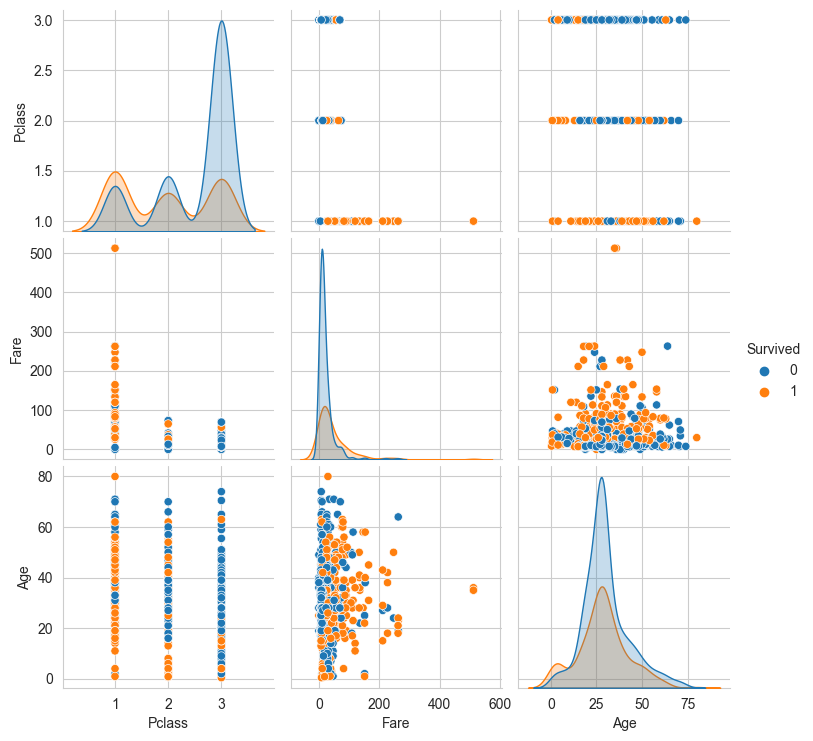

In [398]:
sns.pairplot(data=data,vars=["Pclass","Fare","Age"],hue="Survived")